In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

Data from https://github.com/GregaVrbancic/Phishing-Dataset

In [4]:
df = pd.read_csv("data/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


### Setting up

In [5]:
from sklearn.model_selection import train_test_split

x = df.drop(labels='phishing', axis=1)
y = df['phishing']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=19)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate(model, model_name):
    fig, axs = plt.subplots(1, 2)
    axs = axs.flatten()

    ## training accuracy
    train_pred = model.predict(train_x)
    print("%s Train Accuracy %.3f" % (model_name, accuracy_score(train_y, train_pred)))
    confusion = confusion_matrix(train_y, train_pred, normalize='true')
    ConfusionMatrixDisplay(confusion).plot(ax=axs[0], colorbar=False, cmap='Blues')
    axs[0].set_title("Train Data")
    # plt.show()

    test_pred = model.predict(test_x)
    print("%s Test Accuracy %.3f" % (model_name, accuracy_score(test_y, test_pred)))
    confusion = confusion_matrix(test_y, test_pred, normalize='true')
    ConfusionMatrixDisplay(confusion).plot(ax=axs[1], colorbar=False, cmap='Blues')
    axs[1].set_title("Test Data")

    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import pickle
import numpy as np

models = [LinearSVC(dual=False),
          KNeighborsClassifier(), 
          LogisticRegression(max_iter=2000), 
          DecisionTreeClassifier(max_depth=5),
          GaussianNB(),
          AdaBoostClassifier(),
          MLPClassifier()
]
names = ["SVM",
         "KNN",
         "Logistic Regression",
         "Decision Tree",
         "Naive Bayes",
         "AdaBoost",
         "MLP"]
size = np.logspace(1, 5.0, 13)[:-1]

data_size = np.ndarray((7, len(size), 3))
for i, model in enumerate(models):
    print(names[i])
    accuracy = []
    min_accuracy = []
    maj_accuracy = []
    for h, n in enumerate(size):
        n = int(n)
        trial_min_acc = []
        trial_maj_acc = []
        trial_acc = []
        for t in range(10):
            subset_x = train_x.sample(n)
            subset_y = train_y.loc[subset_x.index]
            model.fit(subset_x, subset_y)
            test_pred = model.predict(test_x)
            confusion = confusion_matrix(test_y, test_pred, normalize='true')
            min_a = confusion[0, 0] / confusion[0].sum()
            maj_a = confusion[1, 1] / confusion[1].sum()
            trial_acc.append(accuracy_score(test_y, test_pred))
            trial_min_acc.append(min_a)
            trial_maj_acc.append(maj_a)
        data_size[i, h, 0] = np.array(trial_acc).mean()
        data_size[i, h, 1] = np.array(trial_min_acc).mean()
        data_size[i, h, 2] = np.array(trial_maj_acc).mean()

pickle.dump(data_size, open("size.pk", 'wb'))

SVM


/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNN
Logistic Regression


/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Decision Tree
Naive Bayes
AdaBoost
MLP


/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(7, 12, 3)


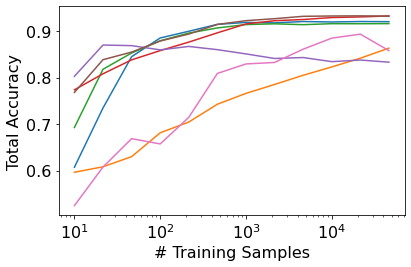

In [12]:
acc = pickle.load(open("size.pk", 'rb'))
plt.rcParams.update({'font.size': 16})
print(acc.shape)

for i, model in enumerate(models):
    accuracy = []
    for h, split in enumerate(size):
        accuracy.append(acc[i, h, 2])
    plt.plot(size, accuracy, label=names[i])
# plt.xscale("log")
# plt.legend()
plt.xlabel("# Training Samples")
plt.ylabel("Not Phishing Accuracy")
plt.tight_layout()
plt.xscale("log")
plt.savefig("size_acc_nophish.pdf")
plt.savefig("size_acc_nophish.png", dpi=500)

plt.clf()

for i, model in enumerate(models):
    accuracy = []
    for h, split in enumerate(size):
        accuracy.append(acc[i, h, 1])
    plt.plot(size, accuracy, label=names[i])
# plt.xscale("log")
# plt.legend()
plt.xlabel("# Training Samples")
plt.ylabel("Phishing Accuracy")
plt.tight_layout()
plt.xscale("log")
plt.savefig("size_acc_phish.pdf")
plt.savefig("size_acc_phish.png", dpi=500)

plt.clf()
for i, model in enumerate(models):
    accuracy = []
    for h, split in enumerate(size):
        accuracy.append(acc[i, h, 0])
    plt.plot(size, accuracy, label=names[i])
# plt.xscale("log")
# plt.legend()
plt.xlabel("# Training Samples")
plt.ylabel("Total Accuracy")
plt.xscale("log")
plt.tight_layout()
plt.savefig("size_acc.pdf")
plt.savefig("size_acc.png", dpi=500)

SVM
KNN
Logistic Regression
Decision Tree
Naive Bayes
AdaBoost
MLP


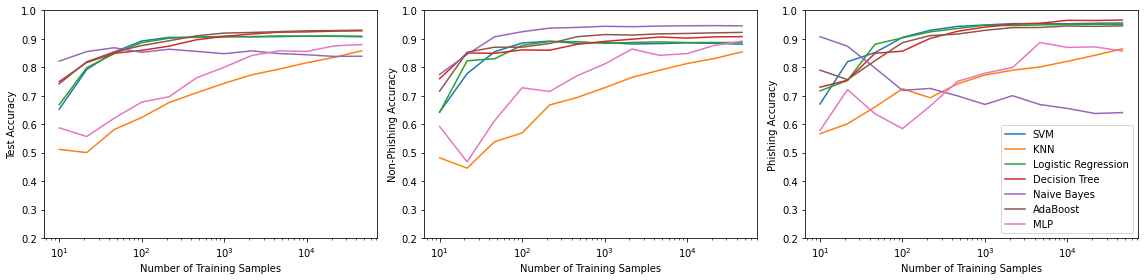

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


models = [LinearSVC(dual=False),
          KNeighborsClassifier(), 
          LogisticRegression(max_iter=10000), 
          DecisionTreeClassifier(max_depth=5),
          GaussianNB(),
          AdaBoostClassifier(),
          MLPClassifier()
]
names = ["SVM",
         "KNN",
         "Logistic Regression",
         "Decision Tree",
         "Naive Bayes",
         "AdaBoost",
         "MLP"]
size = np.logspace(1, 5.0, 13)[:-1]

phish_true = train_y[train_y == True]
phish_false = train_y[train_y == False]
phish_false = phish_false.sample(len(phish_true))

balanced_y = pd.concat([phish_true, phish_false])
balanced_x = train_x.loc[balanced_y.index]


fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs = axs.flatten()
for i, model in enumerate(models):
    print(names[i])
    accuracy = []
    min_accuracy = []
    maj_accuracy = []
    for n in size:
        n = int(n)
        trial_min_acc = []
        trial_maj_acc = []
        trial_acc = []
        for t in range(10):
            subset_x = balanced_x.sample(n)
            subset_y = balanced_y.loc[subset_x.index]
            model.fit(subset_x, subset_y)
            test_pred = model.predict(test_x)
            confusion = confusion_matrix(test_y, test_pred, normalize='true')
            min_a = confusion[0, 0] / confusion[0].sum()
            maj_a = confusion[1, 1] / confusion[1].sum()
            trial_acc.append(accuracy_score(test_y, test_pred))
            trial_min_acc.append(min_a)
            trial_maj_acc.append(maj_a)
        accuracy.append(np.array(trial_acc).mean())
        min_accuracy.append(np.array(trial_min_acc).mean())
        maj_accuracy.append(np.array(trial_maj_acc).mean())


    axs[0].plot(size, accuracy, label=names[i])
    axs[0].set_xscale("log")
    axs[0].set_xlabel("Number of Training Samples")
    axs[0].set_ylabel("Test Accuracy")
    axs[0].set_ylim(0.2, 1)

    axs[1].plot(size, min_accuracy, label=names[i])
    axs[1].set_xscale("log")
    axs[1].set_xlabel("Number of Training Samples")
    axs[1].set_ylabel("Non-Phishing Accuracy")
    axs[1].set_ylim(0.2, 1)

    axs[2].plot(size, maj_accuracy, label=names[i])
    axs[2].set_xscale("log")
    axs[2].set_xlabel("Number of Training Samples")
    axs[2].set_ylabel("Phishing Accuracy")
    axs[2].set_ylim(0.2, 1)

plt.legend()
# plt.show()
plt.tight_layout()
plt.savefig("data_size_balanced.pdf")
plt.savefig("data_size_balanced.png")